In [185]:
from pandas_datareader import data  
import datetime
import pandas as pd

start_date = datetime.datetime(2017, 1, 1, 0, 0)
now = datetime.datetime.now()
end_date = datetime.datetime(now.year, now.month, now.day, 0, 0)

stock = data.get_data_yahoo(input("Input stock id as '005930.ks': "), start_date, end_date)

stock = stock.astype('int32')
stock = stock.abs()
stock = stock.reset_index()

Input stock id as '005930.ks': 002020.ks


In [186]:
stock

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-01-02,59600,57600,58500,59400,45998,54011
1,2017-01-03,59800,58300,59800,58700,43021,53375
2,2017-01-04,59600,58000,58600,59100,30499,53739
3,2017-01-05,62000,59500,59900,60400,118862,54921
4,2017-01-06,61200,59800,60500,60000,49076,54557
...,...,...,...,...,...,...,...
1339,2022-06-22,23050,21200,23050,21350,89098,21350
1340,2022-06-23,21700,20550,21300,20800,62083,20800
1341,2022-06-24,21950,20600,20600,21800,26551,21800
1342,2022-06-27,23250,21850,22000,23100,37081,23100


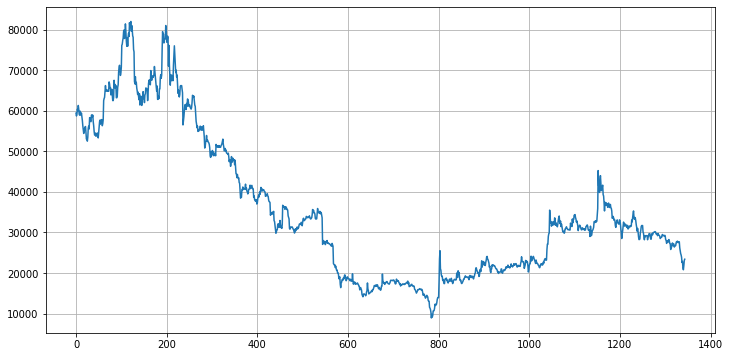

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

stock['Close'].plot(figsize=(12,6), grid=True);

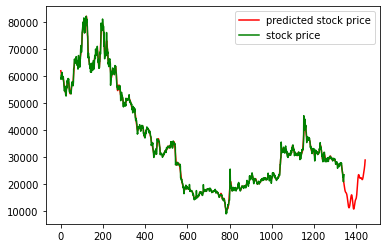

In [198]:
def predict_fft(x, predict_num):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)
    x_notrend = x - p[0] * t
    x_freqdom = np.fft.fft(x_notrend)
    f = np.fft.fftfreq(n)
    index = list(range(n))
    index.sort(key=lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + predict_num)
    rs = np.zeros(t.size)
    for i in index[:201]:
        ampli = np.absolute(x_freqdom[i])/n
        phase = np.angle(x_freqdom[i])
        rs += ampli*np.cos(2*np.pi*f[i]*t+phase)
    return np.array([0 if i < 0 else i for i in (rs + p[0]*t)])

predict = predict_fft(stock['Close'], 100)
plt.plot(np.arange(0, predict.size), predict, 'r', label='predicted stock price')
plt.plot(np.arange(0, stock['Close'].size), stock['Close'], 'g', label='stock price')
plt.legend(loc='upper right')
plt.show()